<a href="https://colab.research.google.com/github/AasthaLokhande/AasthaLokhande-Predictive-Maintenance-for-Manufacturing-Equipment/blob/master/predictive_maintainence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression Model MSE: 1103.2844396957576
Random Forest Classifier Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200

SVM Classifier Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       191
           1       0.00      0.00      0.00         9

    accuracy                           0.95       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.91      0.95      0.93       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

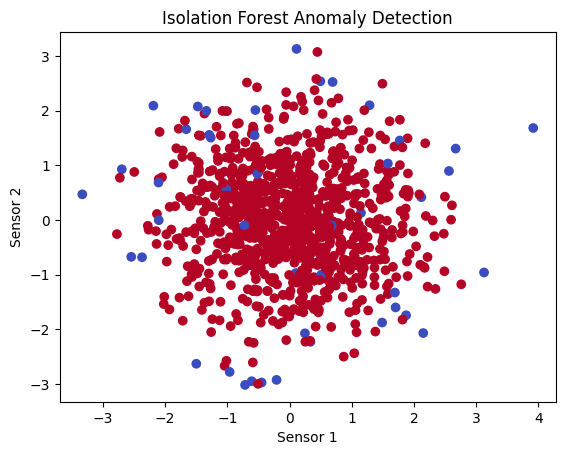

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Generate mock data
np.random.seed(42)
data = pd.DataFrame({
    'sensor_1': np.random.normal(0, 1, 1000),
    'sensor_2': np.random.normal(0, 1, 1000),
    'sensor_3': np.random.normal(0, 1, 1000),
    'operational_hours': np.random.randint(100, 5000, 1000),
    'maintenance': np.random.choice([0, 1], 1000, p=[0.95, 0.05])
})
data['RUL'] = 5000 - data['operational_hours'] - (data['sensor_1'] + data['sensor_2'] + data['sensor_3']).cumsum()
data.to_csv('/content/machinery_data.csv', index=False)

# Load data
data = pd.read_csv('/content/machinery_data.csv')

# Feature selection and normalization
features = ['sensor_1', 'sensor_2', 'sensor_3', 'operational_hours']
target_rul = 'RUL'
target_maintenance = 'maintenance'


scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Split data for regression and classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data[features], data[target_rul], test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(data[features], data[target_maintenance], test_size=0.2, random_state=42)

# Train regression model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Regression Model MSE: {mse_reg}")

# Train Random Forest classifier
clf_model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model_rf.fit(X_train_clf, y_train_clf)
y_pred_clf_rf = clf_model_rf.predict(X_test_clf)
accuracy_clf_rf = accuracy_score(y_test_clf, y_pred_clf_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_clf_rf}")
print(classification_report(y_test_clf, y_pred_clf_rf))

# Train SVM classifier for maintenance prediction
clf_model_svm = SVC(kernel='linear', random_state=42)
clf_model_svm.fit(X_train_clf, y_train_clf)
y_pred_clf_svm = clf_model_svm.predict(X_test_clf)
accuracy_clf_svm = accuracy_score(y_test_clf, y_pred_clf_svm)
print(f"SVM Classifier Accuracy: {accuracy_clf_svm}")
print(classification_report(y_test_clf, y_pred_clf_svm))

# Train Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = isolation_forest.fit_predict(data[features])

# Visualize anomaly detection results
plt.scatter(data['sensor_1'], data['sensor_2'], c=data['anomaly'], cmap='coolwarm')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Isolation Forest Anomaly Detection')
plt.show()


In [ ]:
# Prediction function
def predict_maintenance(features):
    # Standardize input features
    features = scaler.transform([features])

    # Predict RUL
    rul_pred = reg_model.predict(features)

    # Predict maintenance status using both classifiers
    maint_pred_rf = clf_model_rf.predict(features)
    maint_pred_svm = clf_model_svm.predict(features)

    # Predict anomaly using Isolation Forest
    anomaly_pred = isolation_forest.predict(features)

    return {
        'RUL Prediction': rul_pred[0],
        'Random Forest Maintenance Prediction': 'Needs Maintenance' if maint_pred_rf[0] == 1 else 'Normal',
        'SVM Maintenance Prediction': 'Needs Maintenance' if maint_pred_svm[0] == 1 else 'Normal',
        'Anomaly Detection': 'Anomaly' if anomaly_pred[0] == -1 else 'Normal'
    }

# Take user inputs
sensor_1 = float(input("Enter Sensor 1 Reading: "))
sensor_2 = float(input("Enter Sensor 2 Reading: "))
sensor_3 = float(input("Enter Sensor 3 Reading: "))
operational_hours = float(input("Enter Operational Hours: "))

# Collect the inputs into a feature list and predict
sample_features = [sensor_1, sensor_2, sensor_3, operational_hours]
prediction = predict_maintenance(sample_features)

# Display the prediction result
print(f"Predicted Maintenance Indicator: {prediction}")

Enter Sensor 1 Reading: 0.3
Enter Sensor 2 Reading: .6
Enter Sensor 3 Reading: 0.4
Enter Operational Hours: 0.2
Predicted Maintenance Indicator: {'RUL Prediction': 4839.50795417239, 'Random Forest Maintenance Prediction': 'Normal', 'SVM Maintenance Prediction': 'Normal', 'Anomaly Detection': 'Normal'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
! pip install streamlit -q

In [ ]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.148.8.14


In [ ]:
! streamlit run dashboard.py & npx localtunnel --port 8501

/bin/bash: line 1: streamlit: command not found
your url is: https://nine-games-accept.loca.lt
